Problem Statement No. 01
Consider the “Academic performance” dataset of students (Academic_Performance_Dataset.csv) and perform the
following operations using Python.<br>
a) Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any
of the suitable techniques to deal with them.
b) Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
c) Apply data transformations on categorical variables to convert it into numerical variables.
Reason and document your approach properly.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("data/Academic_Performance.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STUDENT_ID          12411 non-null  object 
 1   GENDER              12389 non-null  object 
 2   PLACEMENT           12396 non-null  object 
 3   HONOR_OPTED_OR_NOT  12397 non-null  object 
 4   EDUCATION_TYPE      12396 non-null  object 
 5   ACADEMIC_PROGRAM    12377 non-null  object 
 6   COURSE 1 MARKS      12400 non-null  float64
 7   COURSE 2 MARKS      12403 non-null  float64
 8   COURSE 3 MARKS      12397 non-null  float64
 9   COURSE 4 MARKS      12397 non-null  float64
 10  COURSE 5 MARKS      12389 non-null  float64
 11  PERCENTILE          12411 non-null  int64  
 12  OVEARLL_GRADE       12411 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 1.2+ MB


In [4]:
df.isnull().sum()

STUDENT_ID             0
GENDER                22
PLACEMENT             15
HONOR_OPTED_OR_NOT    14
EDUCATION_TYPE        15
ACADEMIC_PROGRAM      34
COURSE 1 MARKS        11
COURSE 2 MARKS         8
COURSE 3 MARKS        14
COURSE 4 MARKS        14
COURSE 5 MARKS        22
PERCENTILE             0
OVEARLL_GRADE          0
dtype: int64

In [5]:
print(df.shape)

(12411, 13)


In [6]:
# a)
# M1: just drop all rows with null values
# df.dropna(inplace=True)

In [7]:
# M2: fill numerical values with 0 or mean and cat. cols with mode
num = df.select_dtypes(include=['int64', 'float64']).columns
cat = df.select_dtypes(include=['object']).columns

df[num] = df[num].fillna(value=0)
df[cat] = df[cat].fillna(value=df[cat].mode().iloc[0])

In [8]:
# Remove one -1 value from the marks 1 column (CAN BE SKIPPED!)
df['COURSE 1 MARKS'] = df['COURSE 1 MARKS'].apply(lambda x: x if 0 <= x <= 100 else 0)

In [9]:
df.isnull().sum()

STUDENT_ID            0
GENDER                0
PLACEMENT             0
HONOR_OPTED_OR_NOT    0
EDUCATION_TYPE        0
ACADEMIC_PROGRAM      0
COURSE 1 MARKS        0
COURSE 2 MARKS        0
COURSE 3 MARKS        0
COURSE 4 MARKS        0
COURSE 5 MARKS        0
PERCENTILE            0
OVEARLL_GRADE         0
dtype: int64

<Axes: >

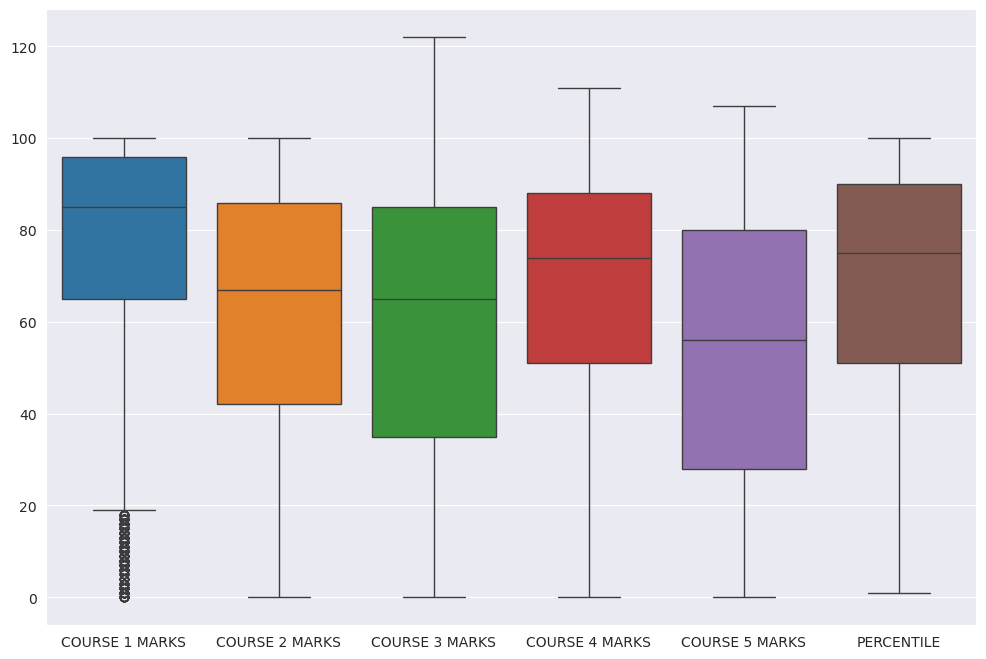

In [10]:
# b)
num = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize = (12, 8))
sns.boxplot(num)

In [15]:
num = df.select_dtypes(include=['int64', 'float64']).columns

def rm_outliers(df:pd.DataFrame, col: pd.DataFrame.columns):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr

    df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

for col in num:
    rm_outliers(df, col)

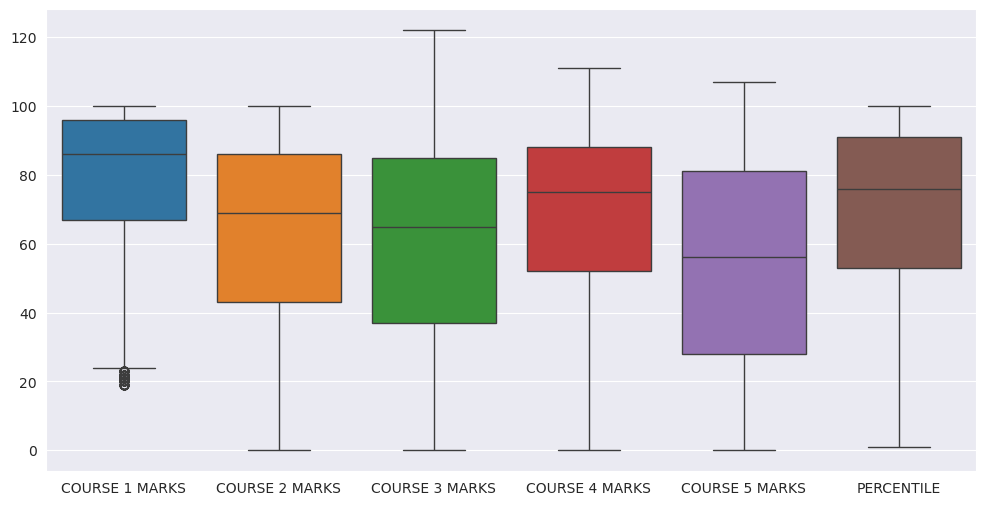

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(df.select_dtypes(include=['number']))
plt.show()

In [17]:
# c)
cat = df.select_dtypes(include=['object']).columns.drop('STUDENT_ID')
df_encoded = pd.get_dummies(df, columns=cat, drop_first=True)
df_encoded.head()


,STUDENT_ID,COURSE 1 MARKS,COURSE 2 MARKS,COURSE 3 MARKS,COURSE 4 MARKS,COURSE 5 MARKS,PERCENTILE,GENDER_M,PLACEMENT_Yes,HONOR_OPTED_OR_NOT_Yes,...,ACADEMIC_PROGRAM_MECHANICAL ENGINEERING,ACADEMIC_PROGRAM_MECHATRONICS ENGINEERING,ACADEMIC_PROGRAM_PRODUCTION ENGINEERING,ACADEMIC_PROGRAM_PRODUCTIVITY AND QUALITY ENGINEERING,ACADEMIC_PROGRAM_TEXTILE ENGINEERING,ACADEMIC_PROGRAM_TOPOGRAPHIC ENGINEERY,ACADEMIC_PROGRAM_TRANSPORTATION AND ROAD ENGINEERING,OVEARLL_GRADE_FIRST CLASS,OVEARLL_GRADE_SECOND CLASS,OVEARLL_GRADE_THIRD CLASS
0,SB11201210000129,71.0,93.0,71.0,93.0,79.0,91,False,True,True,...,False,False,False,False,False,False,False,True,False,False
1,SB11201210000137,97.0,38.0,86.0,98.0,78.0,92,False,True,True,...,False,False,False,False,False,False,False,False,False,True
3,SB11201210007504,65.0,35.0,76.0,80.0,48.0,67,False,True,True,...,False,False,False,False,False,False,False,True,False,False
4,SB11201210007548,94.0,94.0,98.0,100.0,71.0,98,True,True,True,...,False,False,False,False,False,False,False,True,False,False
5,SB11201210007568,86.0,15.0,32.0,97.0,36.0,63,False,True,True,...,False,False,False,False,False,False,False,True,False,False
